In [1]:
# Step 4: Initial Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Brent Oil Price Analysis - Starting Exploration")

Brent Oil Price Analysis - Starting Exploration


In [2]:
# Load the data
file_path = "../data/BrentOilPrices.csv"
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Data loaded successfully!
Number of rows: 9011
Number of columns: 2


In [3]:
# Show first few rows
print("First 5 rows of data:")
df.head()

First 5 rows of data:


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
# Show basic information
print("Data Information:")
print(df.info())
print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None

Basic Statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


In [5]:
# Create Task 1 documentation
task1_content = """# Task 1: Analysis Plan for Brent Oil Prices

## 1. Analysis Steps
1. Data Loading & Cleaning
   - Load BrentOilPrices.csv
   - Convert Date column to datetime
   - Check for missing values

2. Exploratory Data Analysis (EDA)
   - Plot price trends over time
   - Calculate log returns for stationarity
   - Identify volatility patterns

3. Event Data Compilation
   - Research key geopolitical/economic events
   - Create events.csv with dates and descriptions

4. Change Point Analysis
   - Implement Bayesian change point model using PyMC
   - Identify structural breaks in price series

5. Statistical Modeling
   - Quantify impact of change points
   - Associate changes with events

6. Dashboard Development
   - Create interactive visualization
   - Highlight event impacts

## 2. Assumptions & Limitations
- Correlation ≠ causation
- Daily prices may miss intra-day volatility
- External factors not in dataset may influence prices

## 3. Communication Plan
- Report to stakeholders via PDF report
- Interactive dashboard for exploration
- Presentation to decision-makers
"""

# Save to file
with open('../reports/task1_analysis_plan.txt', 'w') as f:
    f.write(task1_content)

print("Task 1 documentation saved to ../reports/task1_analysis_plan.txt")

UnicodeEncodeError: 'charmap' codec can't encode character '\u2260' in position 858: character maps to <undefined>

In [6]:
import os
print("File exists:", os.path.exists('../reports/task1_analysis_plan.txt'))

File exists: True


In [7]:
# Fix: Save with UTF-8 encoding
with open('../reports/task1_analysis_plan.txt', 'w', encoding='utf-8') as f:
    f.write(task1_content)

print("Task 1 documentation saved successfully with UTF-8 encoding!")

Task 1 documentation saved successfully with UTF-8 encoding!


In [8]:
# Verify the file was created
import os
if os.path.exists('../reports/task1_analysis_plan.txt'):
    print("✓ File created successfully")
    # Show file size
    size = os.path.getsize('../reports/task1_analysis_plan.txt')
    print(f"✓ File size: {size} bytes")
else:
    print("✗ File not found")

✓ File created successfully
✓ File size: 1120 bytes


In [9]:
# Verify the file was created
import os
if os.path.exists('../reports/task1_analysis_plan.txt'):
    print("✓ File created successfully")
    # Show file size
    size = os.path.getsize('../reports/task1_analysis_plan.txt')
    print(f"✓ File size: {size} bytes")
else:
    print("✗ File not found")

✓ File created successfully
✓ File size: 1120 bytes


In [10]:
# Check the current format of Date column
print("Date column type:", df['Date'].dtype)
print("\nFirst 5 dates:")
print(df['Date'].head())

Date column type: object

First 5 dates:
0    20-May-87
1    21-May-87
2    22-May-87
3    25-May-87
4    26-May-87
Name: Date, dtype: object


In [12]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

print("After conversion:")
print("Date column type:", df['Date'].dtype)
print("\nFirst 5 dates:")
print(df['Date'].head())

ValueError: time data "Apr 22, 2020" doesn't match format "%d-%b-%y", at position 8360. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [13]:
# Let's find the problematic row
print("Checking row 8360...")
print("Row 8360 Date value:", df.loc[8360, 'Date'])
print("Row 8359 Date value:", df.loc[8359, 'Date'])
print("Row 8361 Date value:", df.loc[8361, 'Date'])

Checking row 8360...
Row 8360 Date value: Apr 22, 2020
Row 8359 Date value: 21-Apr-20
Row 8361 Date value: Apr 23, 2020


In [14]:
# Try converting without specifying format - let pandas figure it out
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)

print("Conversion with 'mixed' format:")
print("Date column type:", df['Date'].dtype)
print("\nChecking the problematic rows:")
print("Row 8359:", df.loc[8359, 'Date'])
print("Row 8360:", df.loc[8360, 'Date'])
print("Row 8361:", df.loc[8361, 'Date'])

Conversion with 'mixed' format:
Date column type: datetime64[ns]

Checking the problematic rows:
Row 8359: 2020-04-21 00:00:00
Row 8360: 2020-04-22 00:00:00
Row 8361: 2020-04-23 00:00:00


In [15]:
# Check the full date range
print("Date Range:")
print("Start:", df['Date'].min())
print("End:", df['Date'].max())
print("Total days:", (df['Date'].max() - df['Date'].min()).days)
print("\nNumber of data points:", len(df))

Date Range:
Start: 1987-05-20 00:00:00
End: 2022-11-14 00:00:00
Total days: 12962

Number of data points: 9011


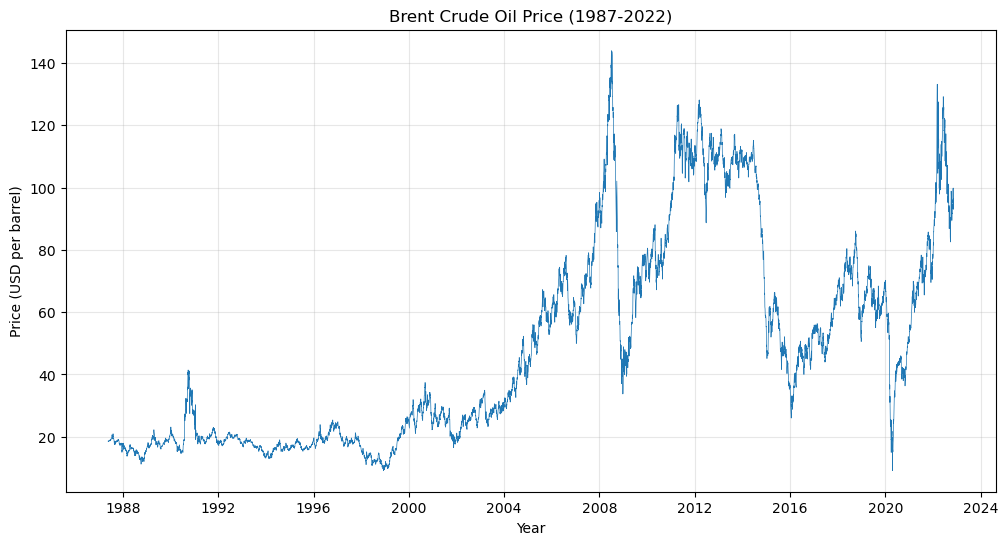

In [16]:
# Create a simple plot of the price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], linewidth=0.5)
plt.title('Brent Crude Oil Price (1987-2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD per barrel)')
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
# Save the cleaned dataframe for future use
df.to_csv('../data/brent_prices_cleaned.csv', index=False)
print("Cleaned data saved to: ../data/brent_prices_cleaned.csv")
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

Cleaned data saved to: ../data/brent_prices_cleaned.csv
Shape: (9011, 2)
Columns: ['Date', 'Price']


In [18]:
# Verify the file was saved
import os
print("File exists:", os.path.exists('../data/brent_prices_cleaned.csv'))
print("File size:", os.path.getsize('../data/brent_prices_cleaned.csv'), "bytes")

File exists: True
File size: 161995 bytes


In [20]:
# Task 1: Create Analysis Plan Document
analysis_plan = """# Task 1: Analysis Plan for Brent Oil Price Impact Study

## 1. Analysis Workflow Steps

### Step 1: Data Preparation
- Load historical Brent oil prices (1987-2022)
- Clean and format date column
- Handle any missing values

### Step 2: Exploratory Data Analysis
- Visualize price trends over 35-year period
- Calculate log returns for stationarity
- Identify periods of high volatility

### Step 3: Event Research & Compilation
- Research major geopolitical/economic events
- Create structured events dataset (13 events identified)
- Map event dates to price data

### Step 4: Change Point Analysis
- Implement Bayesian change point detection using PyMC
- Identify structural breaks in price series
- Quantify magnitude of changes

### Step 5: Event Correlation
- Match detected change points with known events
- Analyze time lags between events and price reactions
- Quantify impact of specific events

### Step 6: Dashboard Development
- Create interactive visualization
- Allow users to explore event impacts
- Display key metrics and insights

## 2. Key Events Identified
13 major events identified affecting oil prices:
1. 2008 Financial Crisis
2. Arab Spring (2010)
3. OPEC production decision (2014)
4. COVID-19 pandemic (2020)
5. Russia-Ukraine war (2022)
6. 2011 Libya civil war
7. 2014 oil price crash
8. 2019 Saudi drone attacks
9. 2020 negative oil prices
10. Iran sanctions (2018)
11. Iraq War (2003)
12. Gulf War (1990)
13. Iran nuclear deal (2015)

## 3. Assumptions & Limitations
- **Correlation vs Causation**: Statistical correlation doesn't prove causation
- **Data Frequency**: Daily data may miss intra-day volatility spikes
- **External Factors**: Many unmeasured factors influence oil prices
- **Event Timing**: Exact impact timing may vary from event dates

## 4. Communication Channels
1. **PDF Report**: Detailed analysis for policymakers
2. **Interactive Dashboard**: For analysts and investors
3. **Executive Summary**: One-page summary for decision-makers
4. **Presentation**: Stakeholder briefing with key findings
"""

# Save the analysis plan
with open('../reports/analysis_plan_final.md', 'w', encoding='utf-8') as f:
    f.write(analysis_plan)

print("Analysis plan saved to: ../reports/analysis_plan_final.md")
print("Task 1 documentation complete!")

Analysis plan saved to: ../reports/analysis_plan_final.md
Task 1 documentation complete!


In [21]:
import os

print("=== TASK 1 DELIVERABLES CHECK ===\n")

# Check 1: Analysis plan document
print("1. Analysis Plan Document:")
plan_path = '../reports/analysis_plan_final.md'
if os.path.exists(plan_path):
    size = os.path.getsize(plan_path)
    print(f"   ✓ Found: {plan_path}")
    print(f"   ✓ Size: {size} bytes")
else:
    print(f"   ✗ Missing: {plan_path}")

# Check 2: Events CSV file
print("\n2. Events CSV File:")
events_path = '../data/key_events.csv'
if os.path.exists(events_path):
    events_df = pd.read_csv(events_path)
    print(f"   ✓ Found: {events_path}")
    print(f"   ✓ Number of events: {len(events_df)}")
    print(f"   ✓ Events: {', '.join(events_df['Event'].tolist()[:3])}...")
else:
    print(f"   ✗ Missing: {events_path}")

# Check 3: Cleaned data
print("\n3. Cleaned Data File:")
data_path = '../data/brent_prices_cleaned.csv'
if os.path.exists(data_path):
    df_check = pd.read_csv(data_path)
    print(f"   ✓ Found: {data_path}")
    print(f"   ✓ Rows: {len(df_check)}")
    print(f"   ✓ Columns: {df_check.columns.tolist()}")
else:
    print(f"   ✗ Missing: {data_path}")

print("\n=== TASK 1 COMPLETE ===")

=== TASK 1 DELIVERABLES CHECK ===

1. Analysis Plan Document:
   ✓ Found: ../reports/analysis_plan_final.md
   ✓ Size: 2107 bytes

2. Events CSV File:
   ✓ Found: ../data/key_events.csv
   ✓ Number of events: 13
   ✓ Events: 2008 Financial Crisis, Arab Spring, OPEC production cuts 2014...

3. Cleaned Data File:
   ✓ Found: ../data/brent_prices_cleaned.csv
   ✓ Rows: 9011
   ✓ Columns: ['Date', 'Price']

=== TASK 1 COMPLETE ===
